用多项式函数来拟合从余弦函数中采样出的带噪声数据

X = [0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]
y = [ 1.0819082   0.87027612  1.14386208  0.70322051  0.78494746 -0.25265944
 -0.22066063 -0.26595867 -0.4562644  -0.53001927 -0.86481449 -0.99462675
 -0.87458603 -0.83407054 -0.77090649 -0.83476183 -1.03080067 -1.02544303
 -1.0788268  -1.00713288 -1.03009698 -0.63623922 -0.86230652 -0.75328767
 -0.70023795 -0.41043495 -0.50486767 -0.27907117 -0.25994628 -0.06189804]


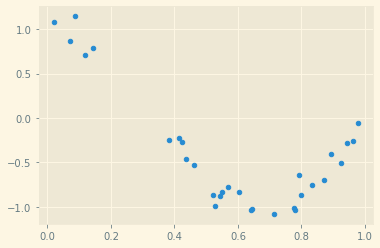

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def true_fun(X): # 真实函数为余弦函数
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30 # 样本数
X = np.sort(np.random.rand(n_samples)) # 随机生成30个x 按从小到大排列
y = true_fun(X) + np.random.randn(n_samples) * 0.1 # 根据真实函数计算对应的y 并加上随机噪声

print('X =', X)
print('y =', y)

with plt.style.context('Solarize_Light2'): # 画图配色方案为 Solarize-light
    plt.scatter(X, y, s=20) # 画出30个样本的散点图

plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly4 = PolynomialFeatures(degree=4, include_bias=False) # x -> [x, x^2, x^3, x^4] 四阶多项式特征 不含常数项
X4 = poly4.fit_transform(X[:, np.newaxis])

X4 # 第i列是x的i次方, i = 1, 2, 3, 4

array([[2.02183974e-02, 4.08783595e-04, 8.26494919e-06, 1.67104028e-07],
       [7.10360582e-02, 5.04612156e-03, 3.58456585e-04, 2.54633428e-05],
       [8.71292997e-02, 7.59151487e-03, 6.61443374e-04, 5.76310980e-05],
       [1.18274426e-01, 1.39888398e-02, 1.65452200e-03, 1.95687639e-04],
       [1.43353287e-01, 2.05501650e-02, 2.94593371e-03, 4.22309282e-04],
       [3.83441519e-01, 1.47027398e-01, 5.63764089e-02, 2.16170559e-02],
       [4.14661940e-01, 1.71944524e-01, 7.12988501e-02, 2.95649195e-02],
       [4.23654799e-01, 1.79483389e-01, 7.60389992e-02, 3.22142869e-02],
       [4.37587211e-01, 1.91482567e-01, 8.37903227e-02, 3.66655736e-02],
       [4.61479362e-01, 2.12963202e-01, 9.82781225e-02, 4.53533253e-02],
       [5.21848322e-01, 2.72325671e-01, 1.42112694e-01, 7.41612710e-02],
       [5.28894920e-01, 2.79729836e-01, 1.47947689e-01, 7.82487812e-02],
       [5.44883183e-01, 2.96897683e-01, 1.61774555e-01, 8.81482342e-02],
       [5.48813504e-01, 3.01196262e-01, 1.65300576e

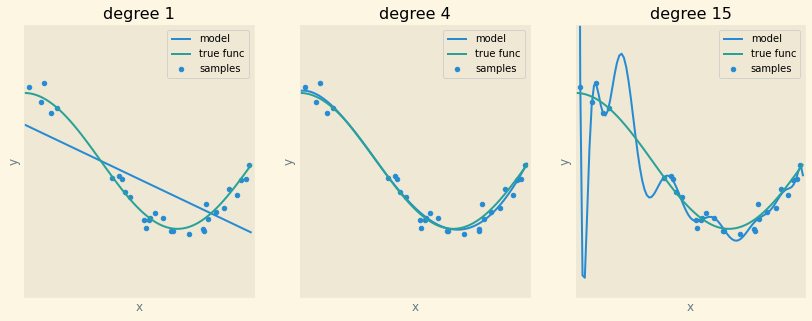

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

degrees = [1, 4, 15] # 分别用 1阶、4阶、15阶 多项式来拟合数据

with plt.style.context('Solarize_Light2'):

    plt.figure(figsize=(14, 5))
    for i in range(len(degrees)):
        ax = plt.subplot(1, len(degrees), i + 1)
        plt.setp(ax, xticks=(), yticks=())

        polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline(
            [
                ("polynomial_features", polynomial_features),
                ("linear_regression", linear_regression),
            ]
        )
        pipeline.fit(X[:, np.newaxis], y)

        X_test = np.arange(0, 1, 0.01)
        plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="model")
        plt.plot(X_test, true_fun(X_test), label="true func")
        plt.scatter(X, y, s=20, label="samples")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim((0, 1))
        plt.ylim((-2, 2))
        plt.legend(loc="best")
        plt.title(
            "degree {}".format(
                degrees[i]
            )
        )
    plt.show()